# 04.5 - LLMs integrated in data analytics and data visualization: Smart Dataframes

Adapted from: https://colab.research.google.com/drive/18JKRdPCnsUIm9d4sThvsySSPAfbc4ybk

## Using Large Language Models (LLMs) in data visualization

LLM can help data visualization tasks in different ways:  
* They can read tables and help us understand the data by creating written summaries  
* They can translate our ideas of visualizations from english to code, accelerating the development process  

Drawbacks:
* They are still not very good. But their potential is increasing.
  
Contents  
* How to instantiate a smart dataframe: pandas + agent.
* How to get simple information from the csv table
* How to create simple plots from english instructions.

Keep in mind OpenAI recomended best practices to get the most out of your queries    
https://platform.openai.com/docs/guides/gpt-best-practices/six-strategies-for-getting-better-results

Official example:  
https://colab.research.google.com/drive/1ZnO-njhL7TBOYPZaqvMvGtsjckZKrv2E?usp=sharing

In [ ]:
# Required libs
# !pip install pandasai
# !pip install seaborn

In [1]:
# Importing libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasai import SmartDataframe
from langchain_openai import ChatOpenAI

In [2]:
# Importing the data
df = pd.read_csv('../Files/SAheart.data')
df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


### Basic EDA
The data we are analysing comes from https://rdrr.io/cran/ElemStatLearn/man/SAheart.html and concerns coronary heart disease (chd).   


Columns | description
--------|------------     
sbp |       systolic blood pressure |   
tobacco|   cumulative tobacco (kg)  
ldl|       low density lipoprotein cholesterol  
adiposity| a numeric vector  
famhist|   family history of heart disease, a factor with levels Absent Present  
typea|     type-A behavior  
obesity|   a numeric vector  
alcohol|   current alcohol consumption  
age|       age at onset  
chd|       response, coronary heart disease  

### Creating a Smart Dataframe

We need an LLM and a pandas dataframe (which we already have).

In [3]:
llm = ChatOpenAI(temperature=0.1) #let's not allow for some randomness

In [4]:
llm.model_name

'gpt-3.5-turbo'

In [5]:
sdf = SmartDataframe(df, config={'llm':llm})

In [6]:
# Let's check the shape of data.'
sdf.chat("What is the shape of the dataset?")

'The shape of the dataset is (462, 11)'

In [7]:
#identifying missing values
sdf.chat("How many missing values are there in each column?")

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
df1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Let us see how the data looks like
sdf.chat("Display 5 records in form of a table.")

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [9]:
# Let us try to write a simple summary of the data:
sdf.chat("A good data summary must have: the number of elements, a qualitative discription of the population in the data by describing the basic statistics for age and family history (famhist).  \
     You first must find the relevant columns in the dataset, age and famhist, then compute the basic statistics and then write the summary.\
     The summary should look like: We have a simple dataset with 222 elements. The population in the set has ages averaging 56, but there are a few elements as young as 10 years and as old as 100. Half of the population has family history, and those that have are much younger - averaging the 40 years.")

C:\Users\luisg\anaconda3\envs\llm\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `predict` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


'We have a simple dataset with 462 elements. The population in the set has ages averaging 42, but there are a few elements as young as 15 years and as old as 64. Half of the population has family history, and those that have are much younger - averaging 192 years.'

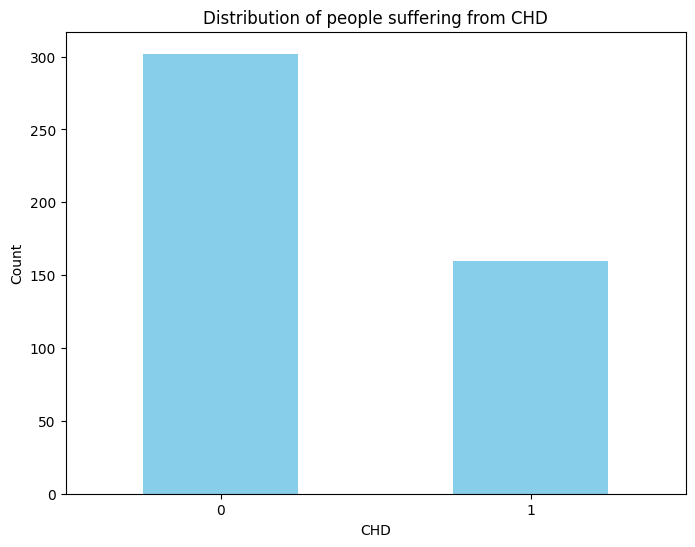

'C:/Users/luisg/Documents/adpro2024/Notebooks/exports/charts/temp_chart.png'

In [10]:
sdf.chat("Show the distribution of people suffering with chd using bar graph.")

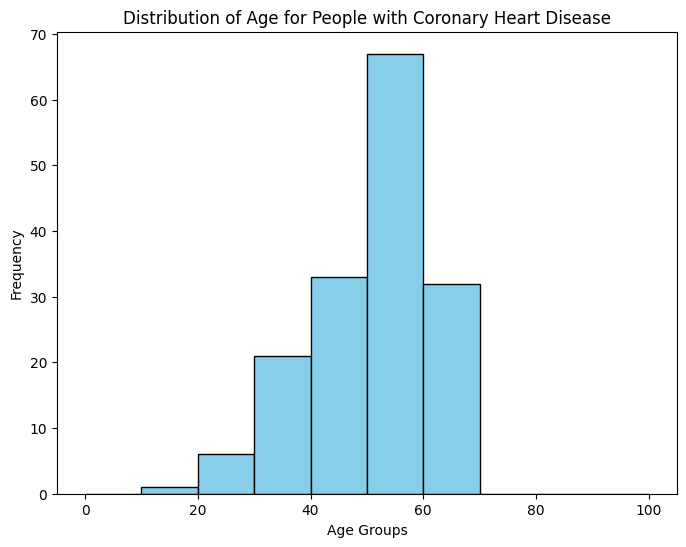

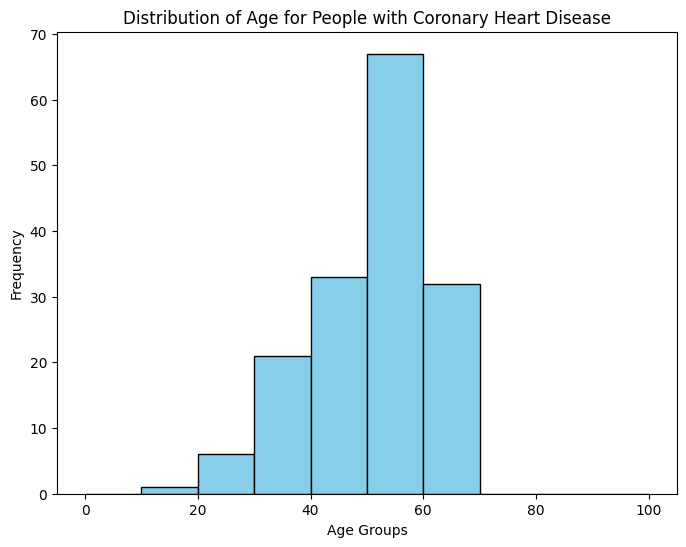

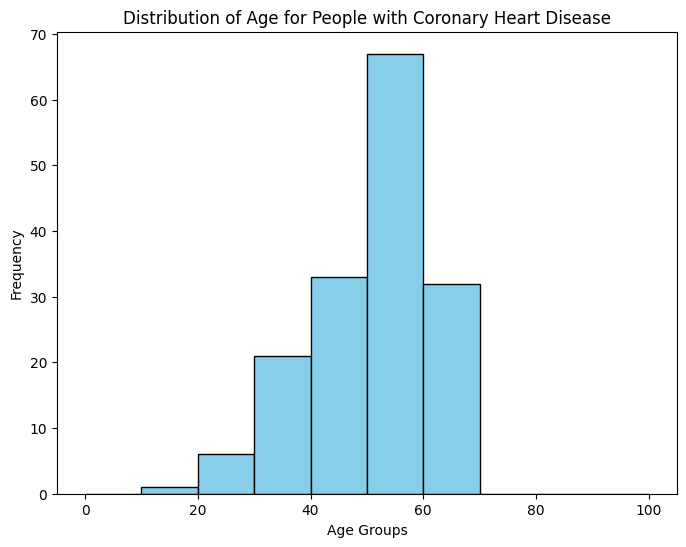

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

In [11]:
sdf.chat("""Show the distribution of age where the person is
suffering with chd using histogram with
0 to 10, 10 to 20, 20 to 30 years and so on. Do not show grid. Add title.""")

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

<Figure size 800x600 with 0 Axes>

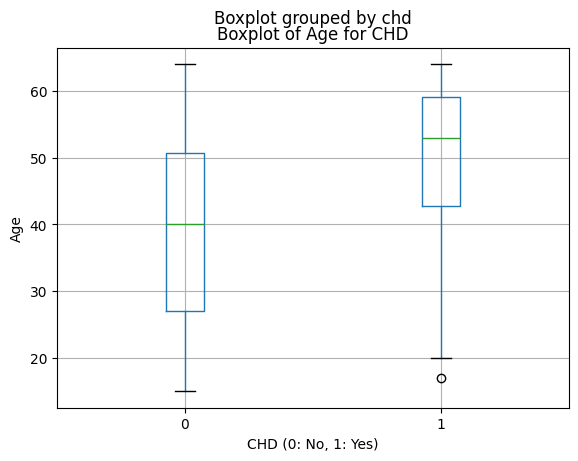

<Figure size 800x600 with 0 Axes>

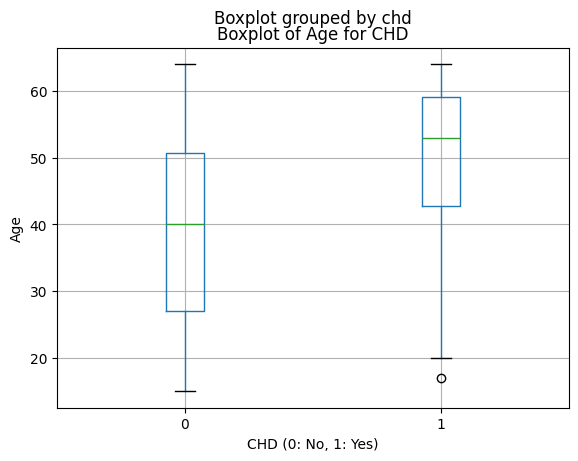

<Figure size 800x600 with 0 Axes>

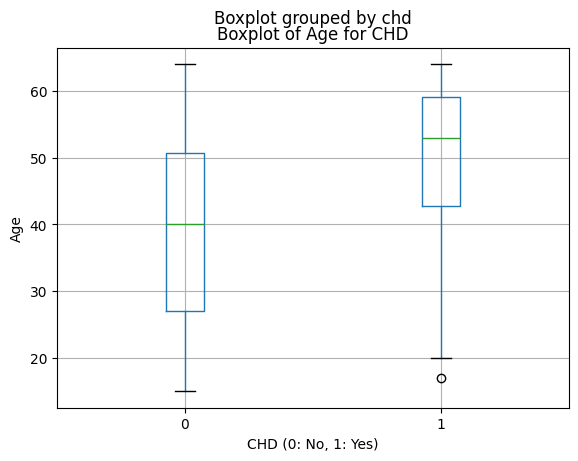

In [12]:
sdf.chat("""Draw boxplot to find out if there are any outliers
in terms of age of who are suffering from chd.""")

In [13]:
# Does Tobacco Cause CHD?
sdf.chat("""validate the following hypothesis with t-test.
Null Hypothesis: Consumption of Tobacco does not cause chd.
Alternate Hypothesis: Consumption of Tobacco causes chd.""")

'T-Stat: 5.252056919525801, P-Value: 2.3038775245460167e-07'

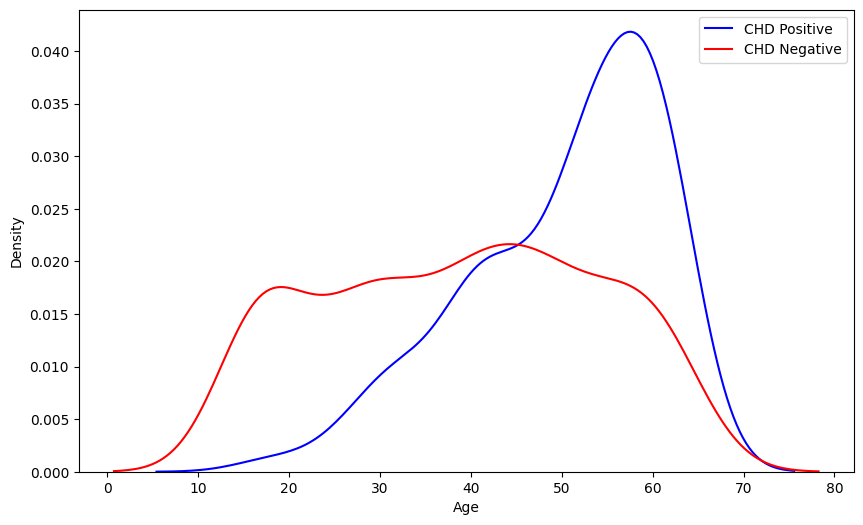

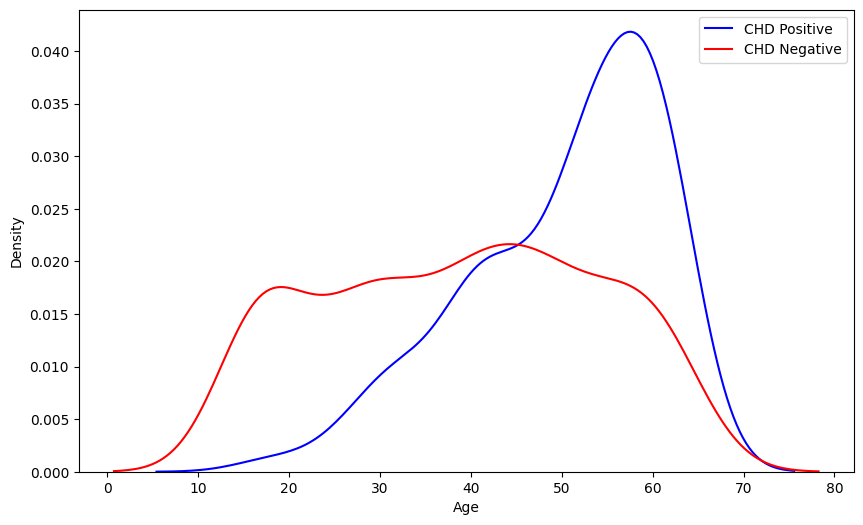

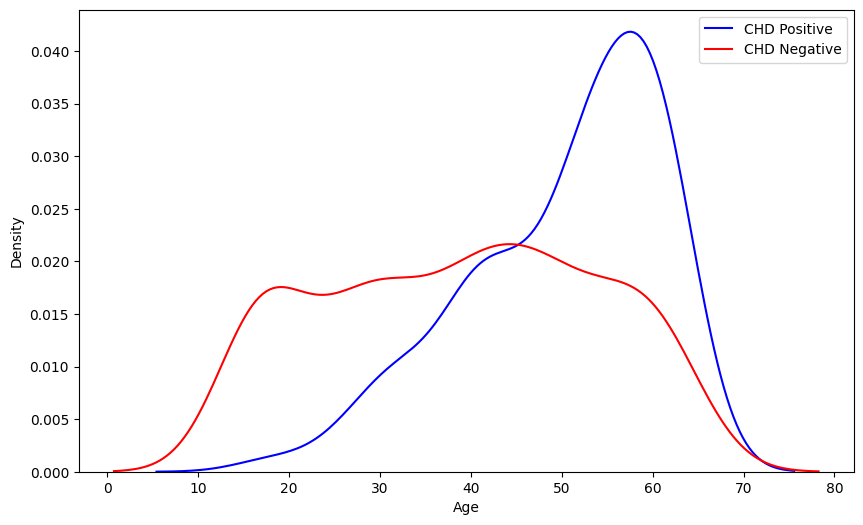

'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

In [14]:
# How is the distribution of CHD across various age groups
sdf.chat("""Plot the distribution of age for both chd positive and negative using kde plot. Also provide a legend and label the x and y axises.""")

<string>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

<string>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.



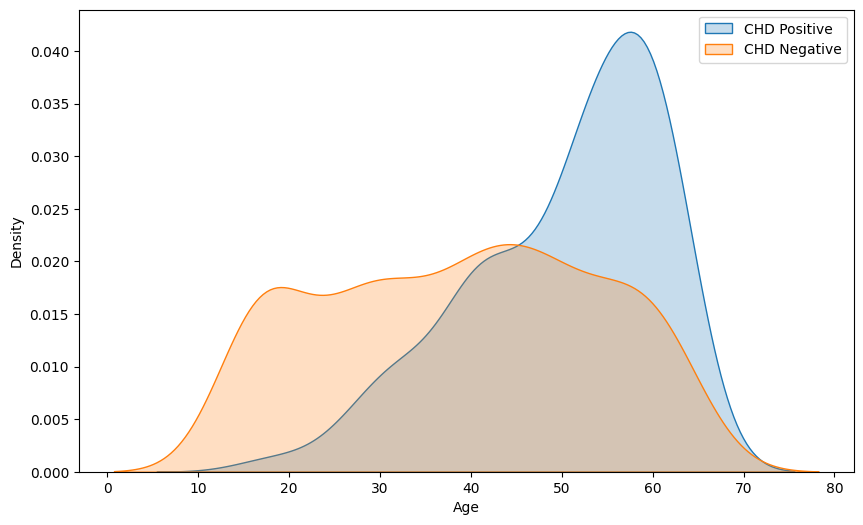

'C:/Users/luisg/Documents/adpro2024/Notebooks/exports/charts/temp_chart.png'

In [16]:
sdf.chat("""Plot the distribution of age for both chd positive and negative using kde plot. Also provide a legend and label the x and y axises. Use filled areas.""")

<Axes: xlabel='age', ylabel='Density'>

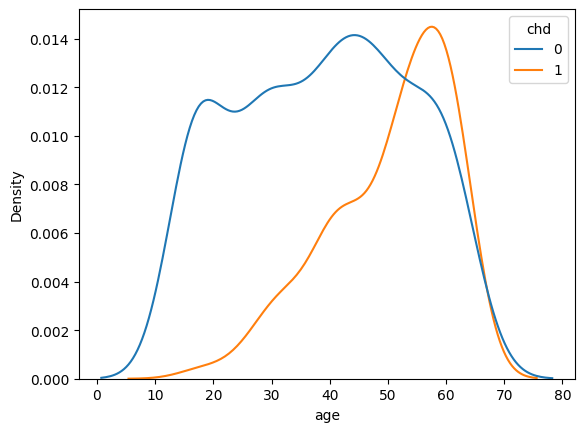

In [17]:
sns.kdeplot(data=df, x='age', hue='chd')

Comments?